# <b><i>Handling Outliers

In [43]:
import numpy as np
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,1100]

In [44]:
## [Lower Fence <----> Higher Fence]

Q1 = np.percentile(lst_marks, [25])
print(Q1)

[54.]


In [45]:
minimum, Q1,Q2,Q3,maximum = np.quantile(lst_marks, [0,0.25,0.5, 0.75, 1.0])

In [46]:
maximum

1100.0

In [47]:
## Inter Quntile Range
IQR = Q3 - Q1
IQR

35.5

In [48]:
lower_fence = Q1 - 1.5*IQR
higher_fence = Q3 + 1.5*IQR

lower_fence, higher_fence

(0.75, 142.75)

In [49]:
outliers = []
for i in lst_marks:
    if i<lower_fence or i > higher_fence:
        print(f"{i} is an outlier")
        outliers.append(i)
    else:
        print(f"{i} is not an outlier")

print(outliers)

45 is not an outlier
32 is not an outlier
56 is not an outlier
75 is not an outlier
89 is not an outlier
54 is not an outlier
32 is not an outlier
89 is not an outlier
90 is not an outlier
87 is not an outlier
67 is not an outlier
54 is not an outlier
45 is not an outlier
98 is not an outlier
99 is not an outlier
67 is not an outlier
74 is not an outlier
1000 is an outlier
1100 is an outlier
[1000, 1100]


In [50]:
rmv_outliers = set(lst_marks) -  set(outliers)

without_outlier = list(rmv_outliers)

print(without_outlier)

[32, 98, 67, 99, 74, 75, 45, 54, 87, 56, 89, 90]


### Using Box plot

<AxesSubplot: >

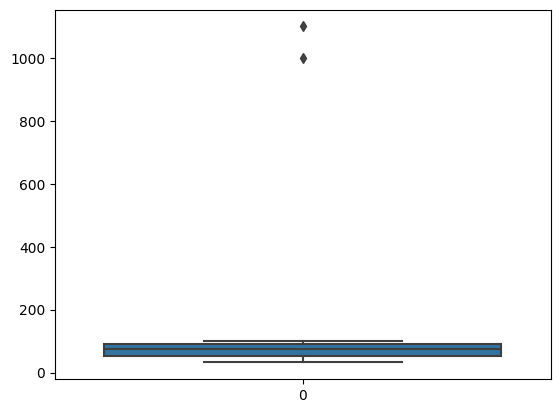

In [51]:
import seaborn as sns

sns.boxplot(lst_marks)

<AxesSubplot: >

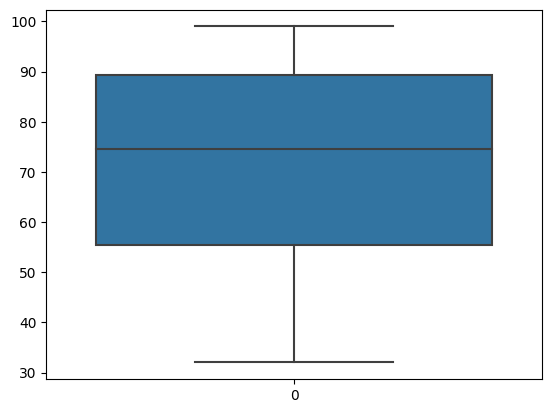

In [52]:
sns.boxplot(without_outlier)

# <b><i>Standardization

In [53]:
import seaborn as sns

In [54]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: ylabel='Count'>

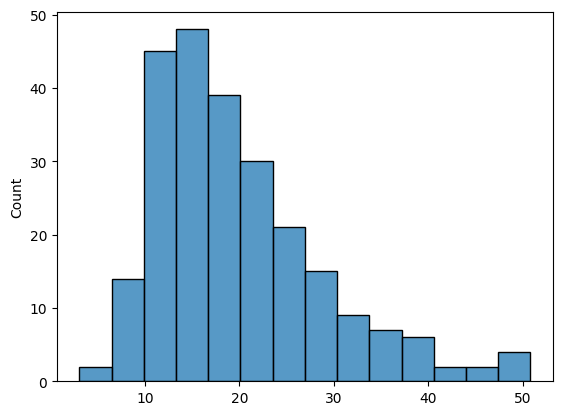

In [55]:
## Calculation of z_score and standardizing it manually
total_bill = list(df['total_bill'])

mean = np.mean(total_bill)
std = np.std(total_bill)

sns.histplot(total_bill)

<AxesSubplot: ylabel='Count'>

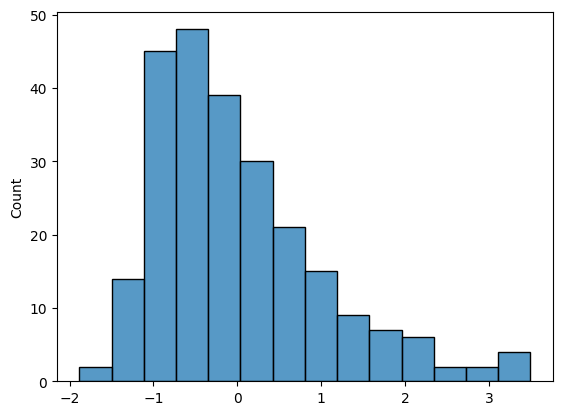

In [56]:
normalized_list = []
for i in total_bill:
    z_score = (i  - mean)/std 
    normalized_list.append(z_score)

sns.histplot(normalized_list)

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['total_bill', 'tip']])
pd.DataFrame(scaler.transform(df[['total_bill', 'tip']]), columns=['total_bill', 'tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


# <b> <i> Normalization - Min Max Scaler

In [5]:
import seaborn as sns 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

dataset = pd.DataFrame(min_max.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length']]), columns=['sepal_length', 'sepal_width', 'petal_length'])
dataset

,sepal_length,sepal_width,petal_length
0,0.222222,0.625000,0.067797
1,0.166667,0.416667,0.067797
2,0.111111,0.500000,0.050847
3,0.083333,0.458333,0.084746
4,0.194444,0.666667,0.067797
...,...,...,...
145,0.666667,0.416667,0.711864
146,0.555556,0.208333,0.677966
147,0.611111,0.416667,0.711864
148,0.527778,0.583333,0.745763
